<a href="https://colab.research.google.com/github/Rajumenan/Detecting-market-trends/blob/main/Market_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting market trends by analyzing financial reports and economic indicators**



## Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [18]:
df = pd.read_csv('/content/marketdata.csv')

## Initial inspection

In [24]:
print(df.describe())

         Price              Close   High                Low  \
count      252                251    251                251   
unique     252                245    245                247   
top     Ticker  183.1300048828125  185.0  183.4499969482422   
freq         1                  2      2                  2   

                      Open    Volume company_name  
count                  251       251          250  
unique                 245       249            1  
top     180.10000610351562  41667300       AMAZON  
freq                     2         2          250  


In [16]:
print("Initial data shape:", df.shape)
print(df.head())

Initial data shape: (252, 7)
        Price               Close                High                 Low  \
0      Ticker                AMZN                AMZN                AMZN   
1        Date                 NaN                 NaN                 NaN   
2  2024-05-08               188.0  188.42999267578125  186.38999938964844   
3  2024-05-09               189.5   191.6999969482422  187.44000244140625   
4  2024-05-10  187.47999572753906  189.88999938964844  186.92999267578125   

                 Open    Volume company_name  
0                AMZN      AMZN          NaN  
1                 NaN       NaN          NaN  
2  187.44000244140625  26136400       AMAZON  
3   188.8800048828125  43368400       AMAZON  
4  189.16000366210938  34141800       AMAZON  


## Clean dataset:

In [19]:
df_cleaned = df.iloc[2:].reset_index(drop=True)

## Convert columns to appropriate types

In [20]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Price'], errors='coerce')
df_cleaned['Close'] = pd.to_numeric(df_cleaned['Close'], errors='coerce')
df_cleaned['High'] = pd.to_numeric(df_cleaned['High'], errors='coerce')
df_cleaned['Low'] = pd.to_numeric(df_cleaned['Low'], errors='coerce')
df_cleaned['Open'] = pd.to_numeric(df_cleaned['Open'], errors='coerce')
df_cleaned['Volume'] = pd.to_numeric(df_cleaned['Volume'].str.replace(',', ''), errors='coerce')

## Drop unnecessary columns

In [21]:
df_cleaned = df_cleaned.drop(columns=['Price'])

print("Cleaned data preview:")
print(df_cleaned.head())

Cleaned data preview:
        Close        High         Low        Open    Volume company_name  \
0  188.000000  188.429993  186.389999  187.440002  26136400       AMAZON   
1  189.500000  191.699997  187.440002  188.880005  43368400       AMAZON   
2  187.479996  189.889999  186.929993  189.160004  34141800       AMAZON   
3  186.570007  188.309998  185.360001  188.000000  24898600       AMAZON   
4  187.070007  187.720001  183.449997  183.820007  38698200       AMAZON   

        Date  
0 2024-05-08  
1 2024-05-09  
2 2024-05-10  
3 2024-05-13  
4 2024-05-14  


## Basic stats

In [22]:
print("Basic statistics:")
print(df_cleaned.describe())

Basic statistics:
            Close        High         Low        Open        Volume  \
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02   
mean   196.786680  199.056120  194.200680  196.747960  4.171982e+07   
min    161.020004  162.960007  151.610001  154.210007  1.500750e+07   
25%    183.637505  185.820000  181.434994  183.680004  3.010568e+07   
50%    190.229996  191.754997  187.425003  190.074997  3.735180e+07   
75%    208.867504  212.527496  206.745003  209.212494  4.460340e+07   
max    242.059998  242.520004  238.029999  239.020004  1.414484e+08   
std     19.185515   19.128593   19.209808   19.250700  1.820825e+07   

                             Date  
count                         250  
mean   2024-11-05 20:15:21.600000  
min           2024-05-08 00:00:00  
25%           2024-08-07 06:00:00  
50%           2024-11-04 12:00:00  
75%           2025-02-05 18:00:00  
max           2025-05-07 00:00:00  
std                           NaN  


## Correlation Heatmap

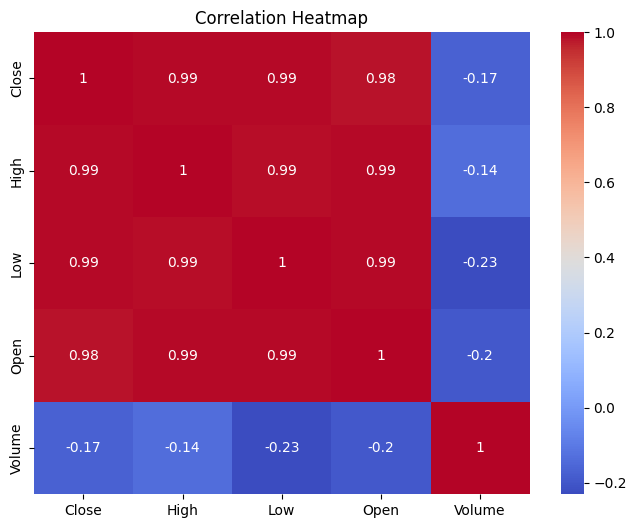

In [23]:
plt.figure(figsize=(8, 6))
corr_matrix = df_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### *  The price metrics (Close, High, Low, Open) are tightly linked → if one rises/falls, the others usually do too.

#### *  Volume behaves more independently and shows only a mild inverse relationship with price.

## Boxplot (Bichat likely meant Boxplot)

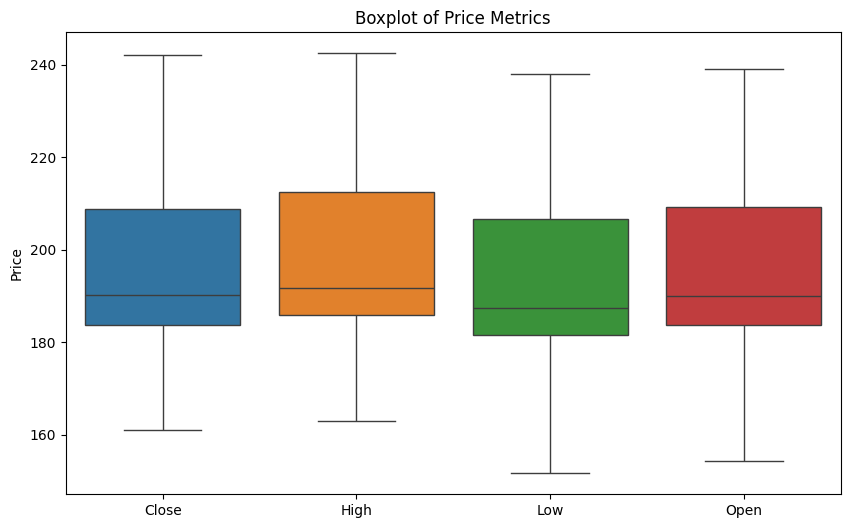

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['Close', 'High', 'Low', 'Open']])
plt.title('Boxplot of Price Metrics')
plt.ylabel('Price')
plt.show()

#### The price volatility is visible through the spread of the whiskers—showing that although the core data is tightly grouped, the market occasionally moves to higher or lower extremes.

## Histogram of Close prices

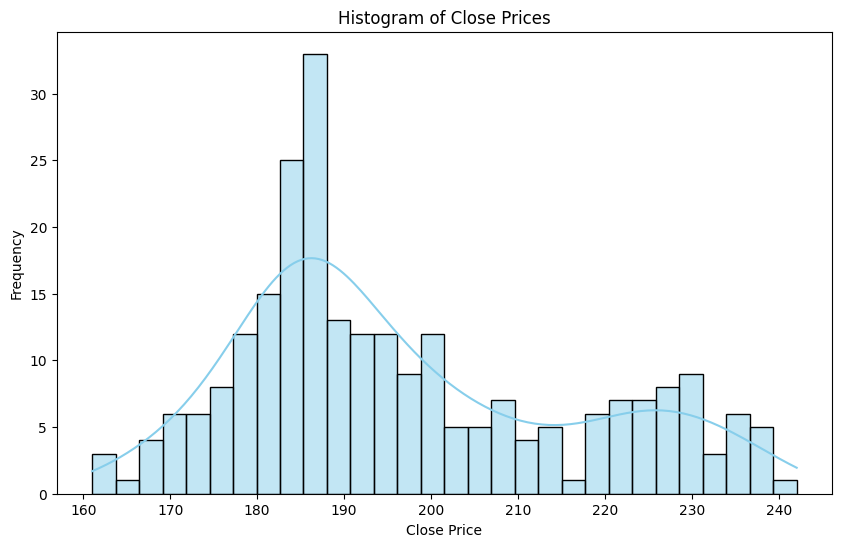

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


#### *  Market tended to close most often around 180–190.

#### *  Occasional higher price periods (220–240) hint at volatility spikes or market rallies.

#### *  The right skew tells us that price surges are less frequent but present.



## Plot Close Price over Time

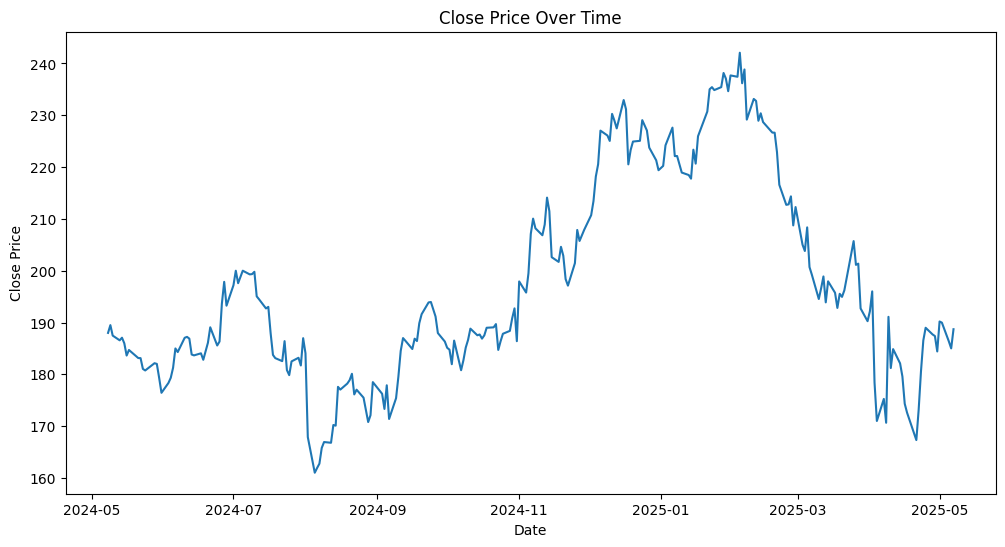

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Date', y='Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## Moving Average (Trend Detection)

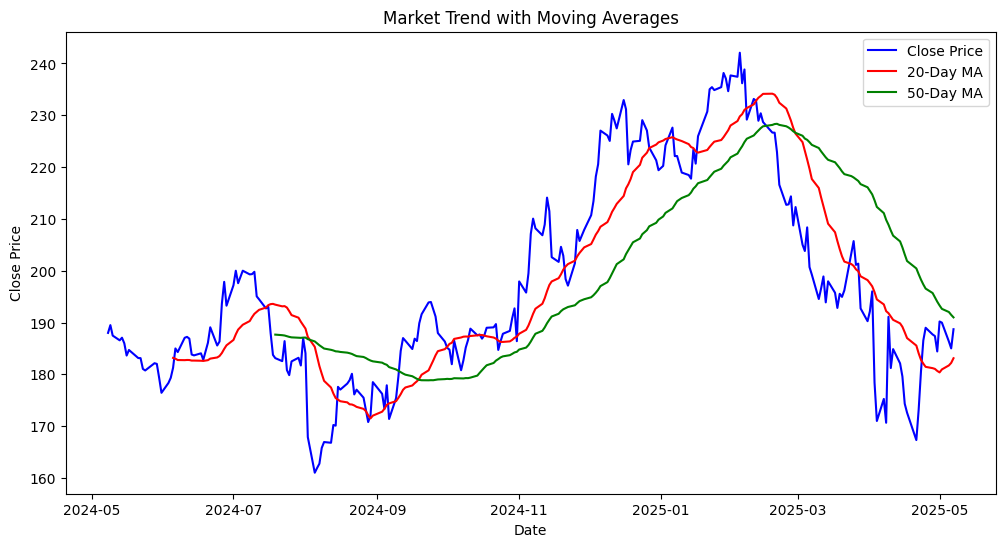

In [16]:
df_cleaned['MA20'] = df_cleaned['Close'].rolling(window=20).mean()
df_cleaned['MA50'] = df_cleaned['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close Price', color='blue')
plt.plot(df_cleaned['Date'], df_cleaned['MA20'], label='20-Day MA', color='red')
plt.plot(df_cleaned['Date'], df_cleaned['MA50'], label='50-Day MA', color='green')
plt.title('Market Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Volatility (Standard Deviation of Close Price)

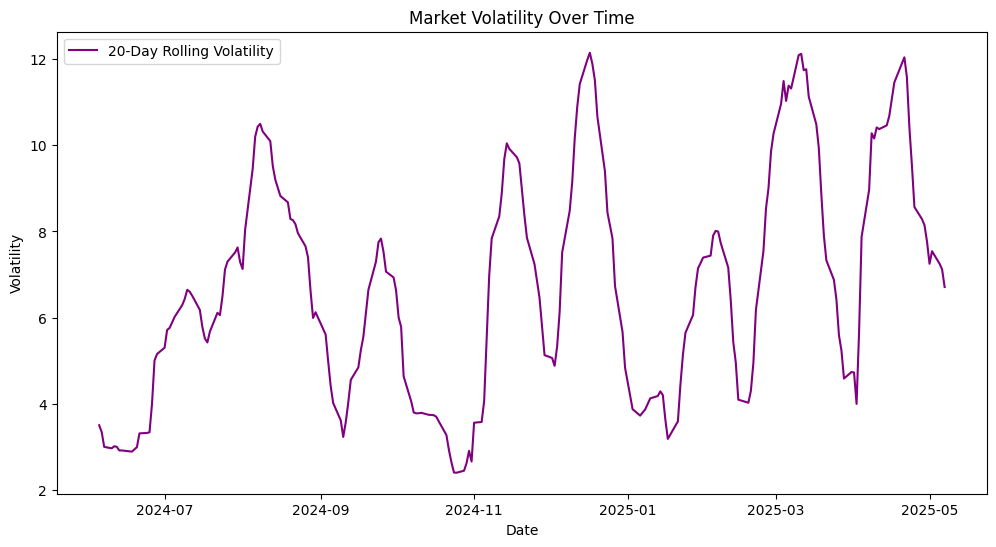

In [17]:
df_cleaned['Volatility'] = df_cleaned['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Volatility'], label='20-Day Rolling Volatility', color='purple')
plt.title('Market Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Detect Bullish/Bearish Trends

In [18]:
def detect_trend(row):
    if row['MA20'] > row['MA50']:
        return 'Bullish'
    elif row['MA20'] < row['MA50']:
        return 'Bearish'
    else:
        return 'Neutral'

df_cleaned['Trend'] = df_cleaned.apply(detect_trend, axis=1)

## Count of trends

In [19]:
trend_counts = df_cleaned['Trend'].value_counts()
print("\nTrend Summary:")
print(trend_counts)


Trend Summary:
Trend
Bullish    121
Bearish     80
Neutral     49
Name: count, dtype: int64


## Visualize Trend Distribution

<ipython-input-20-76abb6d101f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Trend', data=df_cleaned, palette='Set2')


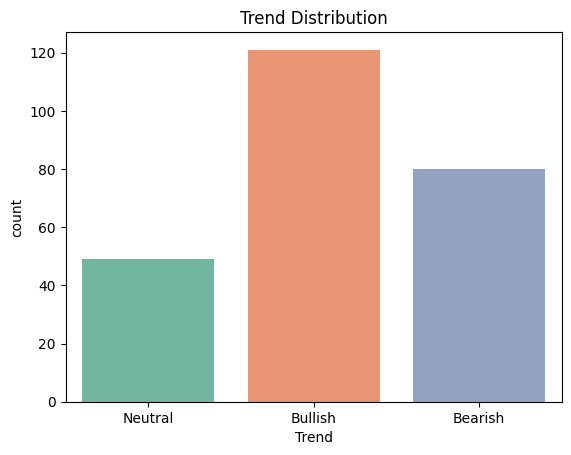

In [20]:
sns.countplot(x='Trend', data=df_cleaned, palette='Set2')
plt.title('Trend Distribution')
plt.show()

## Filter final year data (latest 12 months)

In [21]:
latest_year = df_cleaned['Date'].dt.year.max()
df_year = df_cleaned[df_cleaned['Date'].dt.year == latest_year]

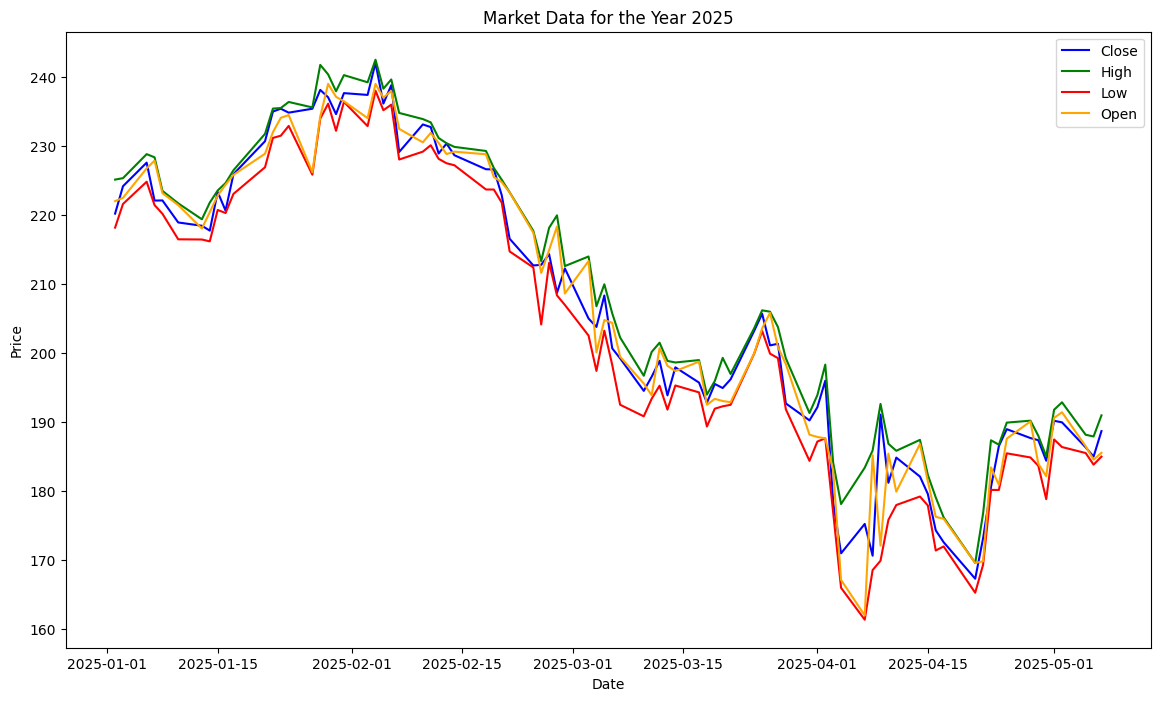

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(df_year['Date'], df_year['Close'], label='Close', color='blue')
plt.plot(df_year['Date'], df_year['High'], label='High', color='green')
plt.plot(df_year['Date'], df_year['Low'], label='Low', color='red')
plt.plot(df_year['Date'], df_year['Open'], label='Open', color='orange')
plt.title(f'Market Data for the Year {latest_year}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion placeholder

In [ ]:
print("\nAnalysis complete: The market trends have been detected and visualized using moving averages and volatility metrics. You can expand this by integrating financial report sentiment or additional economic indicators.")


Analysis complete: The market trends have been detected and visualized using moving averages and volatility metrics. You can expand this by integrating financial report sentiment or additional economic indicators.
